<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [21]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: C:\Users\Imane\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: C:\Users\Imane\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: C:\Users\Imane\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [71]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [75]:
df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'], inplace=True)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [76]:
import numpy as np
def clean_years(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if 'less' in value.lower():
            return 0
        elif 'more' in value.lower():
            return 21
        try:
            return float(value)
        except:
            return np.nan
    return value

# Apply cleaning
df['YearsCodePro_cleaned'] = df['YearsCodePro'].apply(clean_years)
df['YearsCodePro_cleaned']

10        NaN
12       12.0
15       27.0
18       10.0
20        0.0
         ... 
65178    17.0
65241    10.0
65265     2.0
65351     7.0
65412    18.0
Name: YearsCodePro_cleaned, Length: 29117, dtype: float64

In [77]:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21+']
df['YearsCodePro_binned'] = pd.cut(df['YearsCodePro_cleaned'], bins=bins, labels = labels, right=False)
df['YearsCodePro_binned']

10         NaN
12       11-15
15         21+
18       11-15
20         0-5
         ...  
65178    16-20
65241    11-15
65265      0-5
65351     6-10
65412    16-20
Name: YearsCodePro_binned, Length: 29117, dtype: category
Categories (5, object): ['0-5' < '6-10' < '11-15' < '16-20' < '21+']

In [78]:
mean_jobsat_by_range = df.groupby('YearsCodePro_binned')['JobSat'].mean().reset_index()
mean_jobsat_by_range

C:\Users\Imane\AppData\Local\Temp\ipykernel_28452\1291096580.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_jobsat_by_range = df.groupby('YearsCodePro_binned')['JobSat'].mean().reset_index()


,YearsCodePro_binned,JobSat
0,0-5,6.679465
1,6-10,6.902872
2,11-15,7.038134
3,16-20,7.162134
4,21+,7.304784


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\Imane\AppData\Local\Temp\ipykernel_28452\3550819963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_jobsat_by_range, x='YearsCodePro_binned', y='JobSat', palette='viridis')


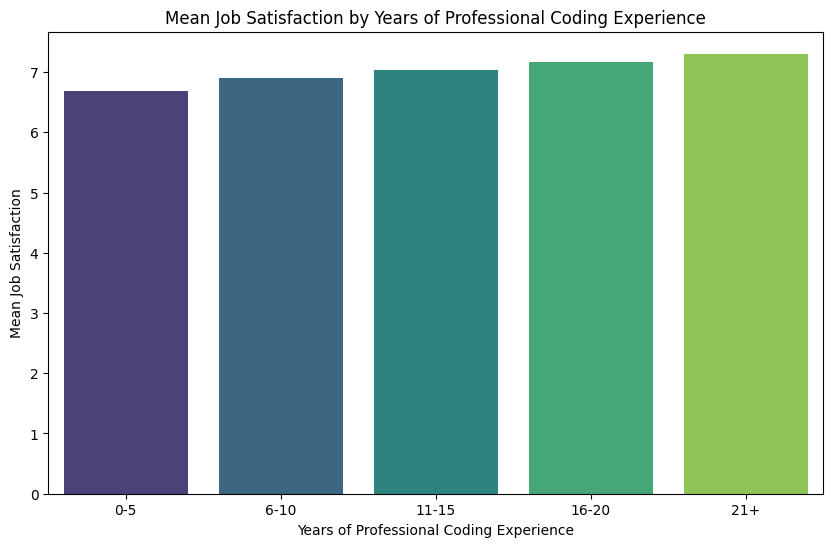

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_jobsat_by_range, x='YearsCodePro_binned', y='JobSat', palette='viridis')
plt.title('Mean Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Mean Job Satisfaction')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [82]:
def simplify_employment(status):
    if pd.isna(status):
        return 'Unknown'
    
    status = str(status).lower()
    
    if 'retired' in status:
        return 'Retired'
    elif 'not employed' in status or 'looking for work' in status:
        return 'Unemployed'
    elif 'student' in status and 'employed' in status:
        return 'Working Student'
    elif 'student' in status:
        return 'Student'
    elif 'part-time' in status and 'employed' in status:
        return 'Part-time Employed'
    elif 'full-time' in status and 'employed' in status:
        return 'Full-time Employed'
    elif 'freelancer' in status or 'independent contractor' in status or 'self-employed' in status:
        return 'Freelancer/Self-Employed'
    elif 'employed' in status:
        return 'Employed (Other)'
    else:
        return 'Other'
df['Employment'] = df['Employment'].apply(simplify_employment)

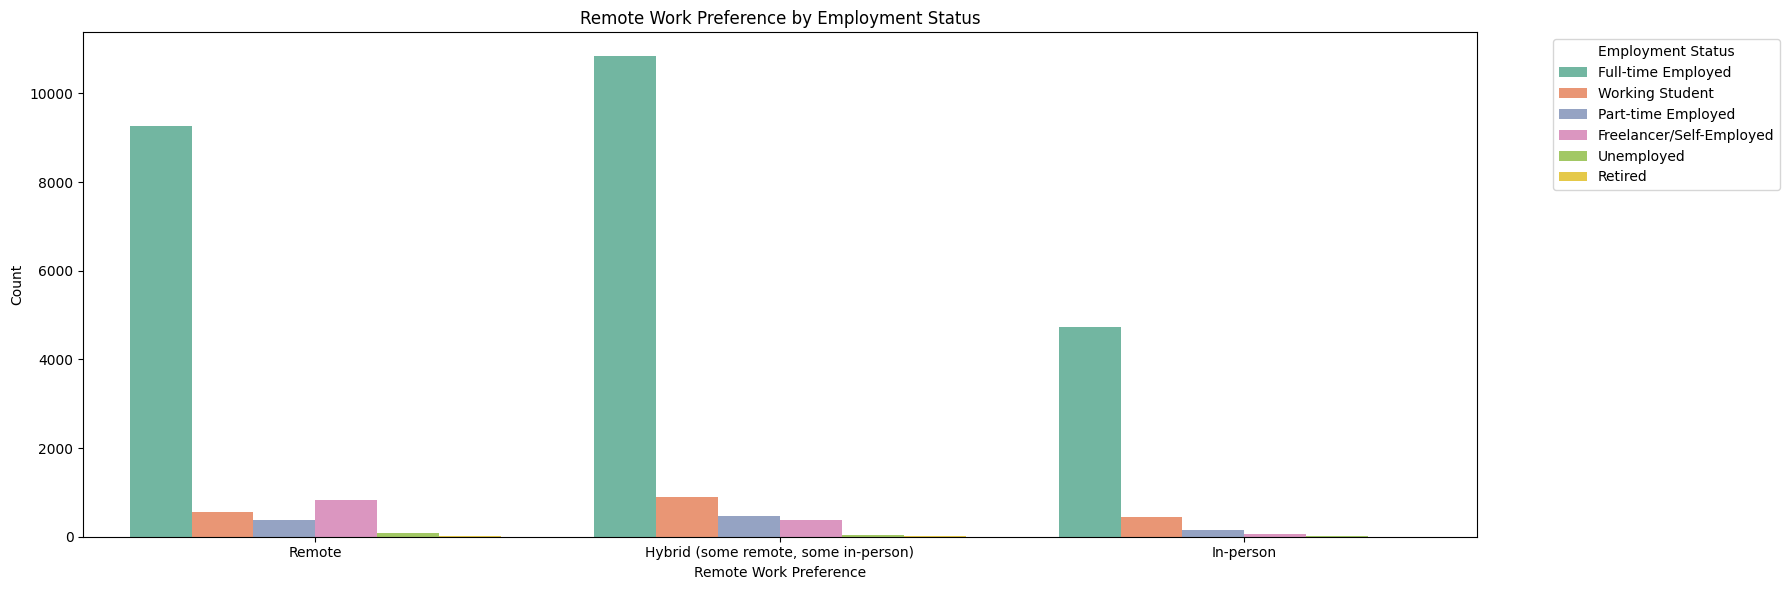

In [86]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='RemoteWork', hue='Employment', palette='Set2')
plt.title('Remote Work Preference by Employment Status')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')

# Move legend to the right
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# We see that the majority of respondents prefer remote work, with a significant portion of full-time employees and freelancers opting for it.
# Part-time employees and students also show a preference for remote work, while the retired group has a lower preference.

remote_employment_cross_tabulate = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100

remote_employment_cross_tabulate.round()


RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
Freelancer/Self-Employed,30.0,4.0,66.0
Full-time Employed,44.0,19.0,37.0
Part-time Employed,48.0,15.0,38.0
Retired,55.0,9.0,36.0
Unemployed,26.0,14.0,60.0
Working Student,47.0,24.0,29.0


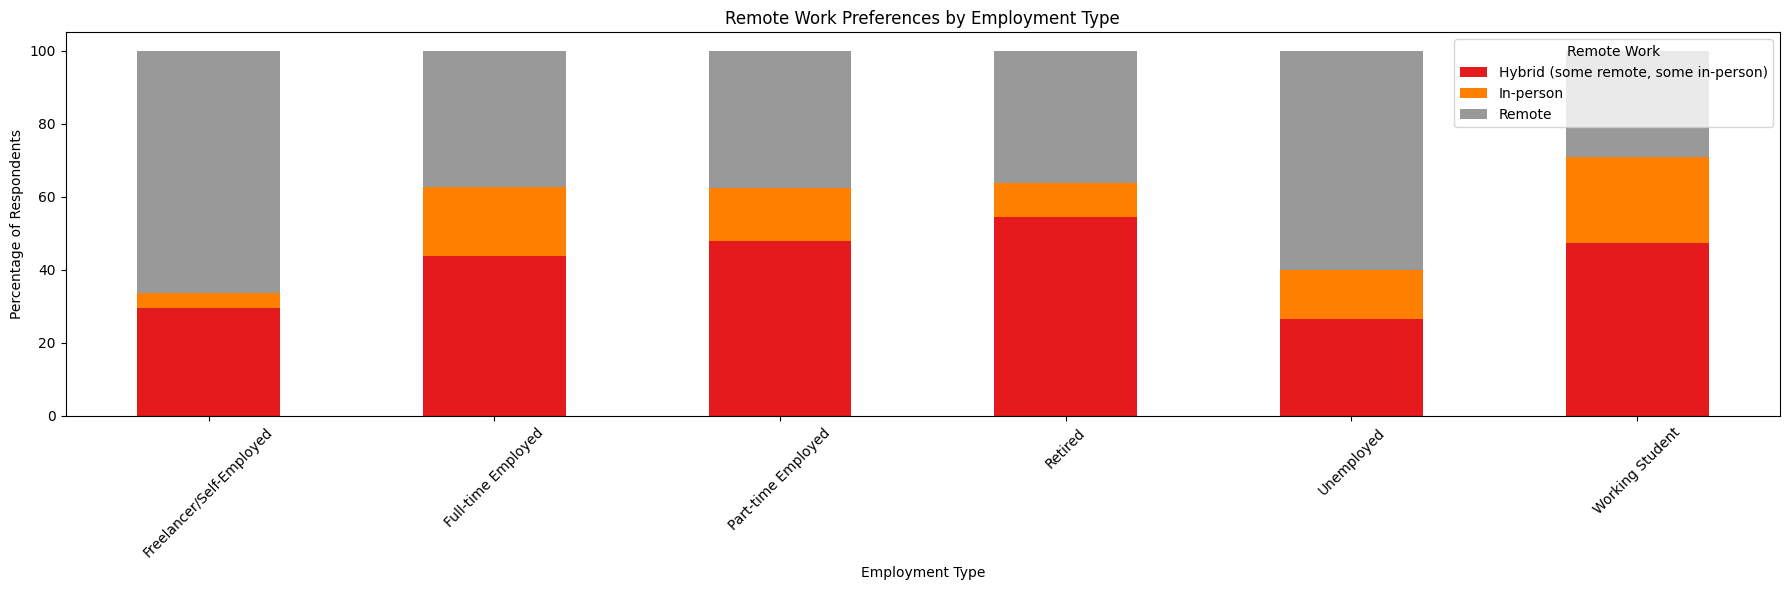

In [95]:
# we see that the majority of respondents prefer remote work, with a significant portion of full-time employees and freelancers opting for it.

remote_employment_cross_tabulate.plot(kind='bar', stacked=True, colormap='Set1', figsize=(18,6))

plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Remote Work')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [99]:
df['LanguageHaveWorkedWith'].dropna(inplace=True)
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

In [106]:
grp_df = df_exploded.groupby(['Country', 'LanguageList']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
grp_df

,Country,LanguageList,Count
4355,United States of America,JavaScript,3532
4373,United States of America,SQL,3221
4369,United States of America,Python,3097
4352,United States of America,HTML/CSS,2936
4336,United States of America,Bash/Shell (all shells),2553
4377,United States of America,TypeScript,2359
4338,United States of America,C#,1756
1450,Germany,JavaScript,1462
4354,United States of America,Java,1420
1734,India,JavaScript,1350


#### Step 8: Correlation Between Experience and Satisfaction


C:\Users\Imane\AppData\Local\Temp\ipykernel_28452\1926487857.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'LanguageList', y = 'Count', data = grp_df, palette='viridis', ci=None)
C:\Users\Imane\AppData\Local\Temp\ipykernel_28452\1926487857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'LanguageList', y = 'Count', data = grp_df, palette='viridis', ci=None)


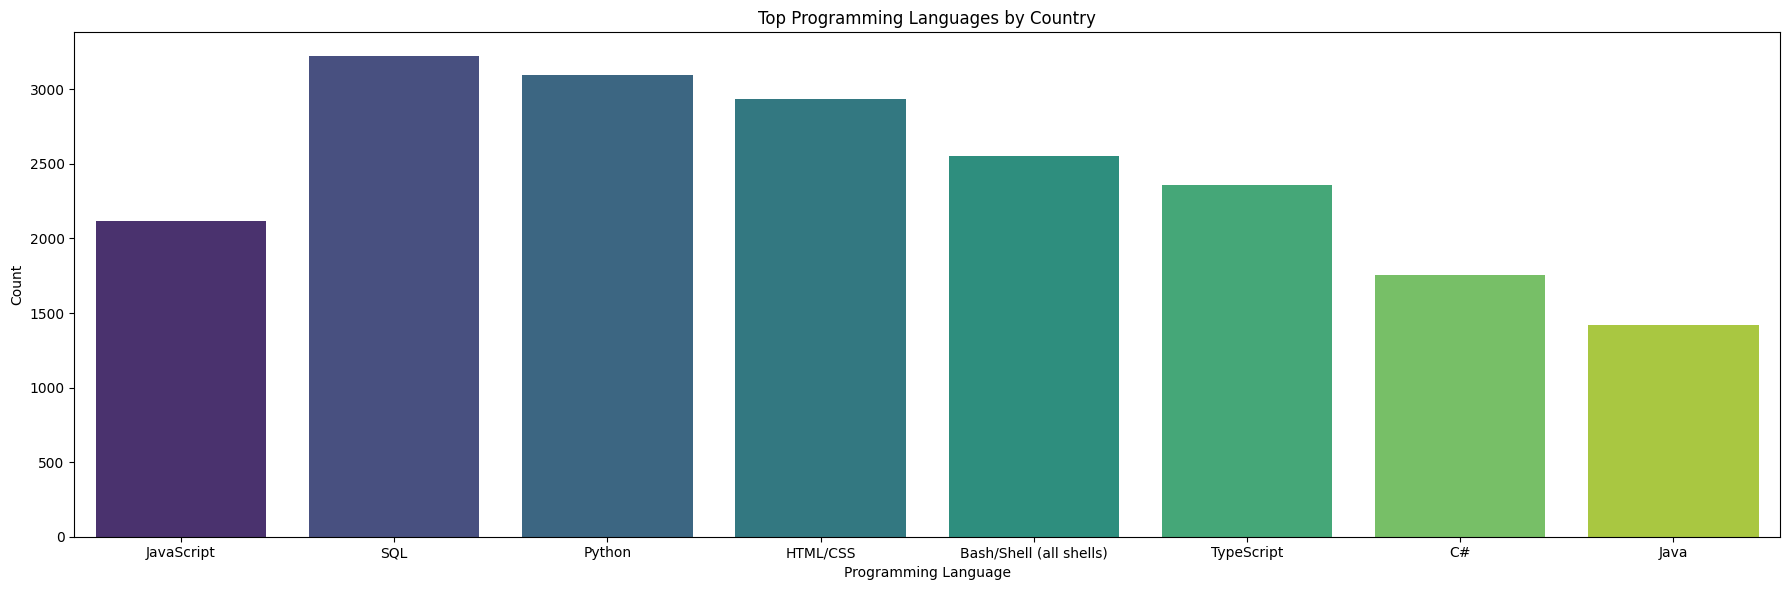

In [115]:
plt.figure(figsize=(18, 6))
sns.barplot(x = 'LanguageList', y = 'Count', data = grp_df, palette='viridis', ci=None)
plt.title('Top Programming Languages by Country')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [134]:
df['JobSatPoints_1'].dropna(inplace=True)
df = df[df['JobSatPoints_1']<52]

C:\Users\Imane\AppData\Local\Temp\ipykernel_28452\1718701474.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)


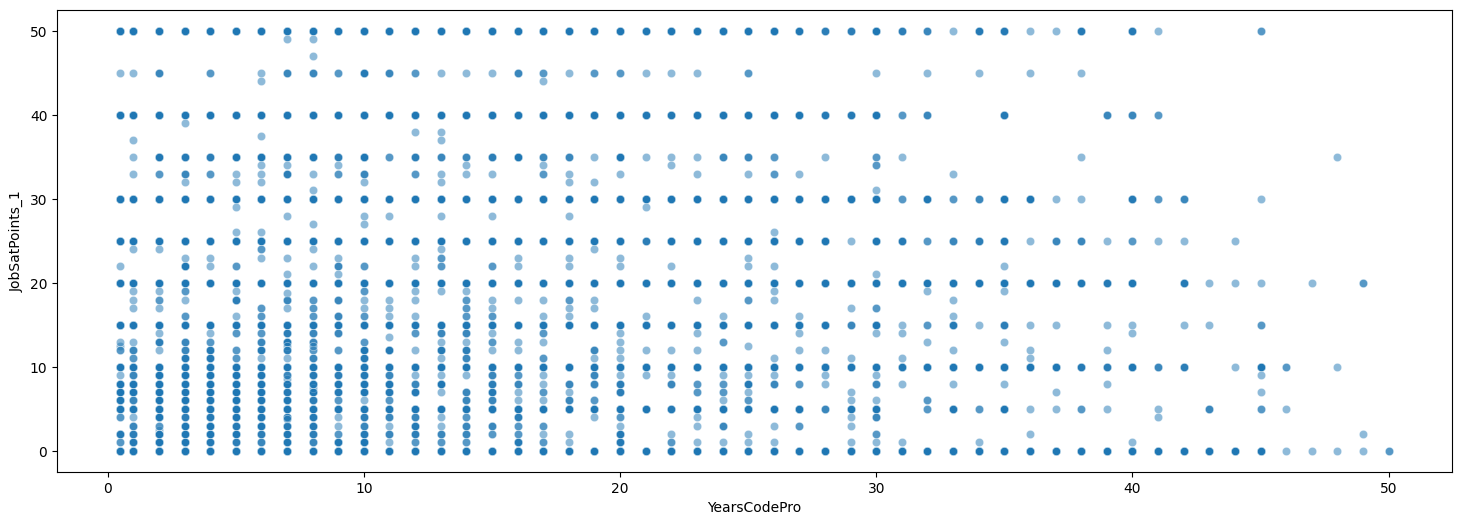

In [136]:
def convert_years(x):
    if isinstance(x, str):
        if x.lower() == 'less than 1 year':
            return 0.5
        elif x.lower() == 'more than 20 years':
            return 21
        else:
            try:
                return float(x)
            except:
                return np.nan
    return x
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)
df['YearsCodePro']

plot_df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

plt.figure(figsize=(18, 6))
sns.scatterplot(data=plot_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [146]:
def cat_EdLevel(education):
    if pd.isna(education):
        return 'Unknown'
    education = str(education).lower()
    
    if 'phd' in education or 'doctorate' in education:
        return 'PhD/Doctorate'
    elif 'master' in education or 'msc' in education:
        return 'Master\'s Degree'
    elif 'bachelor' in education or 'bsc' in education:
        return 'Bachelor\'s Degree'
    elif 'associate' in education:
        return 'Associate Degree'
    elif 'high school' in education or 'secondary school' in education:
        return 'High School Diploma'
    else:
        return 'Other'
df['EdLevel'] = df['EdLevel'].apply(cat_EdLevel)

In [148]:
EdLevel_cross_tabulate = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100

EdLevel_cross_tabulate.round()

Employment,Freelancer/Self-Employed,Full-time Employed,Part-time Employed,Retired,Unemployed,Working Student
EdLevel,,,,,,
Associate Degree,4.0,84.0,3.0,0.0,0.0,9.0
Bachelor's Degree,4.0,87.0,3.0,0.0,1.0,6.0
High School Diploma,5.0,68.0,6.0,0.0,1.0,20.0
Master's Degree,5.0,88.0,3.0,0.0,0.0,4.0
Other,5.0,82.0,4.0,0.0,0.0,9.0


<Figure size 1800x600 with 0 Axes>

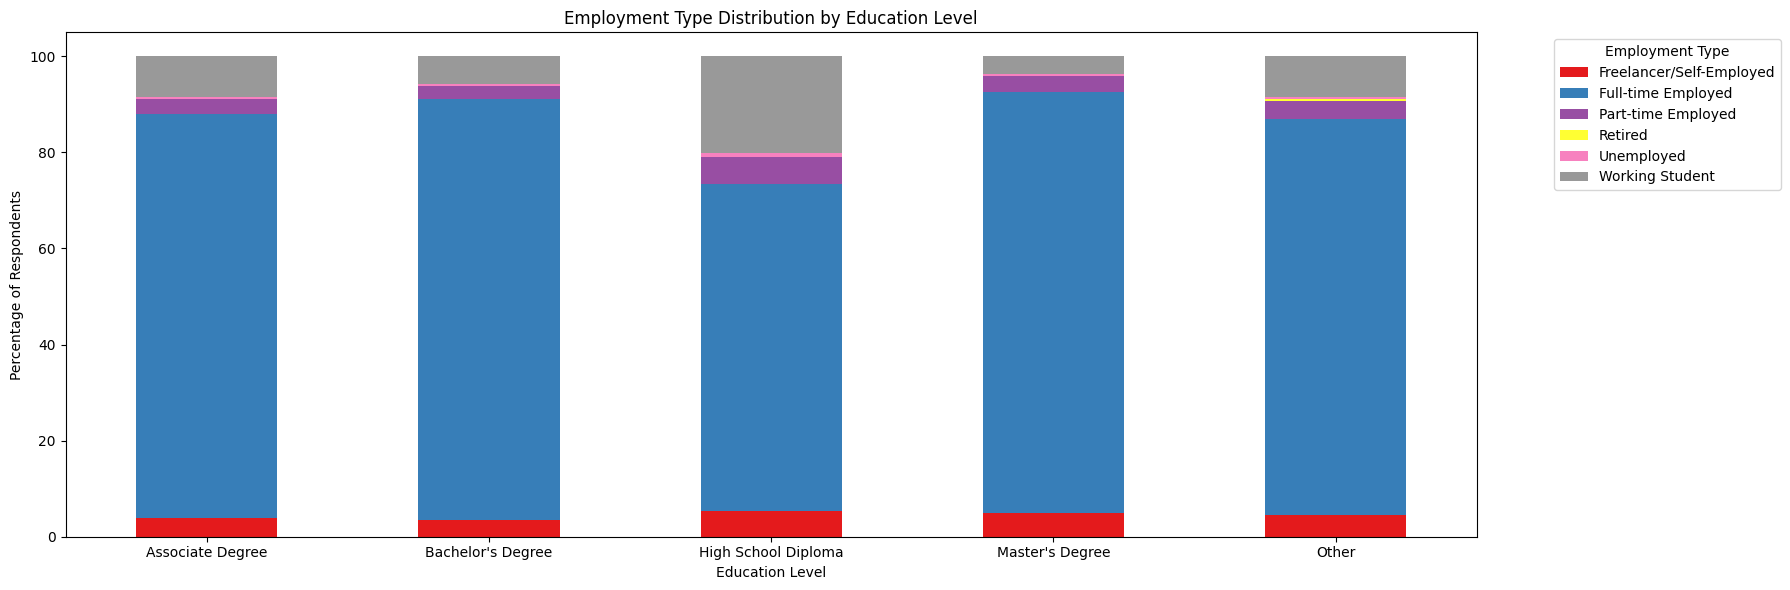

In [156]:
plt.figure(figsize=(18, 6))
EdLevel_cross_tabulate.plot(kind='bar', stacked=True, colormap='Set1', figsize=(18, 6))
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
df.to_csv('Survey_Data_Cleaned.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
